#### Try to work out why instability in MOM6-SIS2 ice shelf run after ~2 hours

In [1]:
import xesmf
import xarray as xr
import os
import cmocean as cm
import cartopy.crs as ccrs
from dask.distributed import Client
import dask.array as da
import numpy as np
import matplotlib.pyplot as plt

In [2]:
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 7
Total threads: 28,Total memory: 125.19 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:35409,Workers: 7
Dashboard: /proxy/8787/status,Total threads: 28
Started: Just now,Total memory: 125.19 GiB
Comm: tcp://127.0.0.1:35529,Total threads: 4
Dashboard: /proxy/38551/status,Memory: 17.88 GiB
Nanny: tcp://127.0.0.1:33703,


In [41]:
prog = xr.open_mfdataset('/scratch/x77/cy8964/mom6/work/mom6-panan-2-testing/19910101.prog.nc',parallel = True)
ice = xr.open_mfdataset('/scratch/x77/cy8964/mom6/work/mom6-panan-2-testing/19910101.ice.nc',parallel = True)
MOM_Shelf_IC = xr.open_mfdataset('/scratch/x77/cy8964/mom6/work/mom6-panan-2-testing/MOM_Shelf_IC.nc',decode_times = False)


/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.07/lib/python3.10/site-packages/dask/array/reductions.py:655: RuntimeWarning: All-NaN slice encountered
  return np.nanmax(x_chunk, axis=axis, keepdims=keepdims)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.07/lib/python3.10/site-packages/dask/array/reductions.py:655: RuntimeWarning: All-NaN slice encountered
  return np.nanmax(x_chunk, axis=axis, keepdims=keepdims)


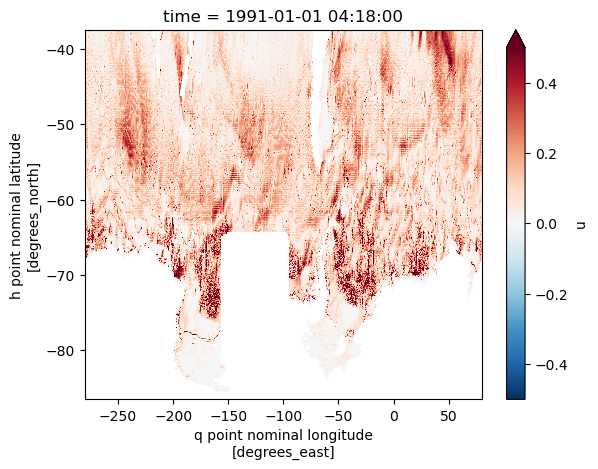

In [4]:
prog.u.isel(time = -1).max('zl').plot(vmax = 0.5, vmin = -0.5, cmap = 'RdBu_r')

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.07/lib/python3.10/site-packages/dask/array/reductions.py:655: RuntimeWarning: All-NaN slice encountered
  return np.nanmax(x_chunk, axis=axis, keepdims=keepdims)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.07/lib/python3.10/site-packages/dask/array/reductions.py:655: RuntimeWarning: All-NaN slice encountered
  return np.nanmax(x_chunk, axis=axis, keepdims=keepdims)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.07/lib/python3.10/site-packages/dask/array/reductions.py:655: RuntimeWarning: All-NaN slice encountered
  return np.nanmax(x_chunk, axis=axis, keepdims=keepdims)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.07/lib/python3.10/site-packages/dask/array/reductions.py:655: RuntimeWarning: All-NaN slice encountered
  return np.nanmax(x_chunk, axis=axis, keepdims=keepdims)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.07/lib/python3.10/site-packages/dask/array/reductions.py:655: RuntimeWarning: All-NaN s

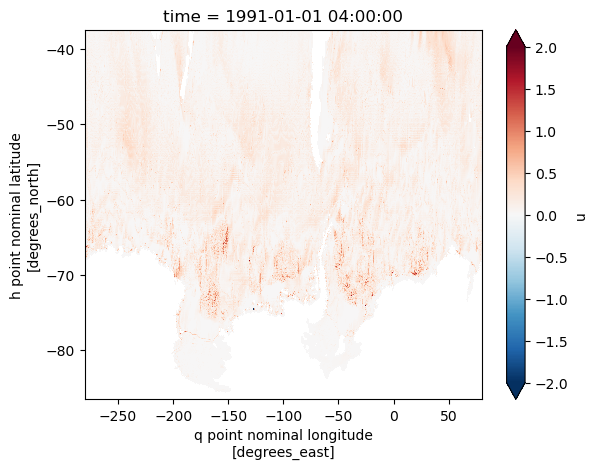

In [6]:
prog.u.isel(time = -4).max('zl').plot(vmax = 2, vmin = -2, cmap = 'RdBu_r')

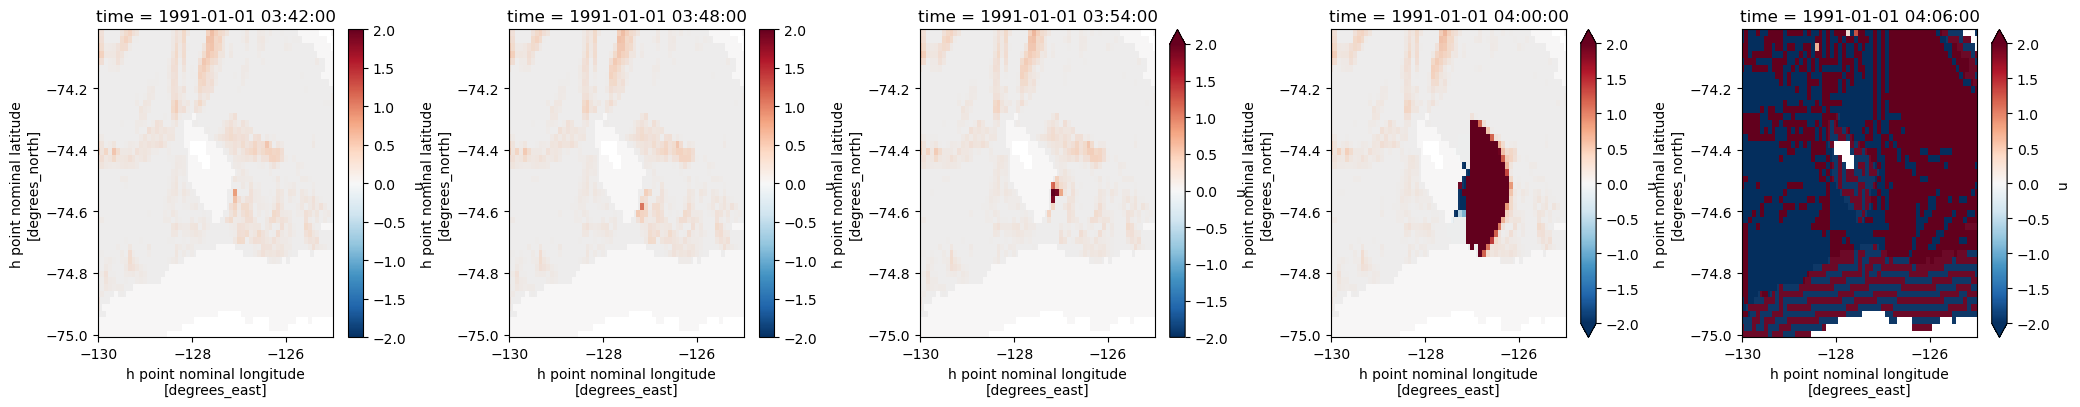

In [35]:
lat_slice = slice(-75,-74)
lon_slice = slice(-130,-125)
fig,axes = plt.subplots(figsize = (25,4),ncols = 5)
prog.u.isel(time = -7).sel(xq = lon_slice, yh = lat_slice).max('zl').plot(ax = axes[0], vmax = 2, vmin = -2, cmap = 'RdBu_r')
prog.u.isel(time = -6).sel(xq = lon_slice, yh = lat_slice).max('zl').plot(ax = axes[1], vmax = 2, vmin = -2, cmap = 'RdBu_r')
prog.u.isel(time = -5).sel(xq = lon_slice, yh = lat_slice).max('zl').plot(ax = axes[2], vmax = 2, vmin = -2, cmap = 'RdBu_r')
prog.u.isel(time = -4).sel(xq = lon_slice, yh = lat_slice).max('zl').plot(ax = axes[3], vmax = 2, vmin = -2, cmap = 'RdBu_r')
prog.u.isel(time = -3).sel(xq = lon_slice, yh = lat_slice).max('zl').plot(ax = axes[4], vmax = 2, vmin = -2, cmap = 'RdBu_r')

for i in np.arange(len(axes)):
    (prog.h.isel(time = -9).sel(yh = lat_slice, xh = lon_slice).sum('zl')).plot(ax = axes[i], vmax = 0.001, cmap = 'Greys',alpha = 0.04,add_colorbar = False)
    axes[i].set_title('time = '+str(prog.u.isel(time = -7+i).time.values))
fig.subplots_adjust(wspace = 0.4)

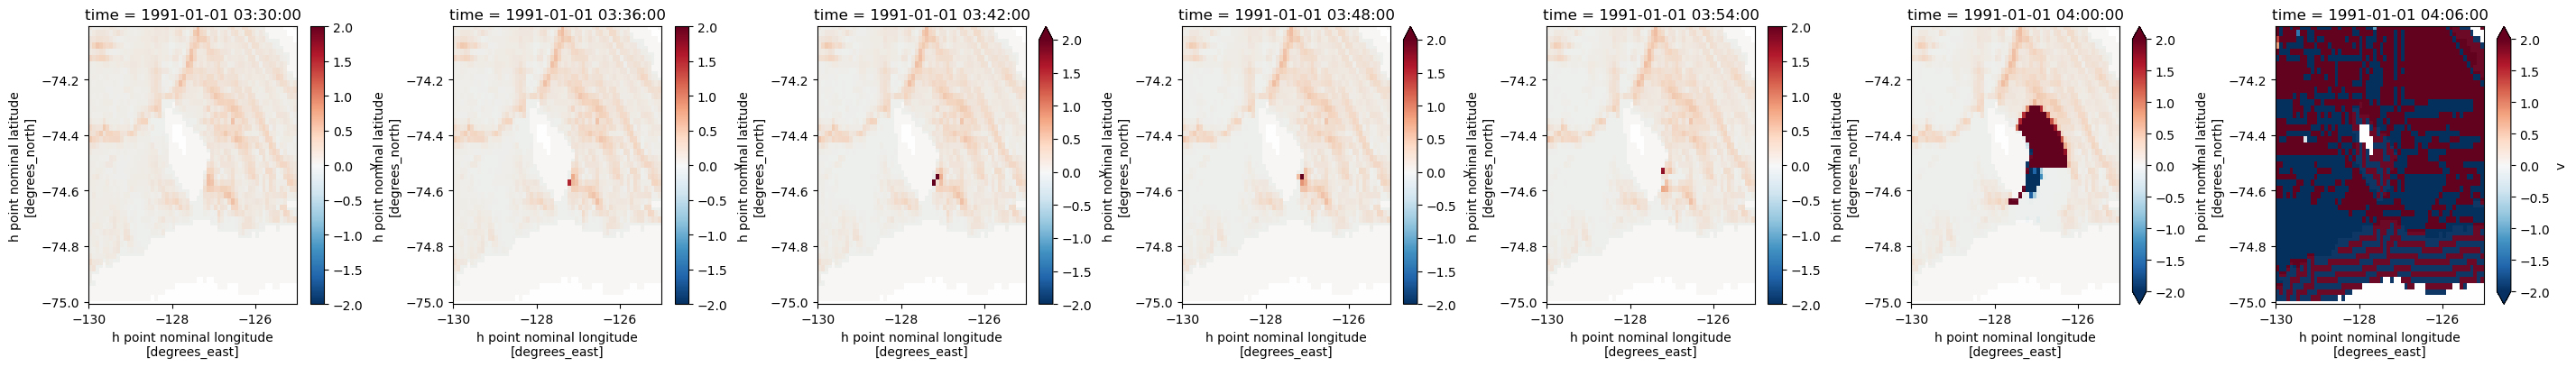

In [38]:
lat_slice = slice(-75,-74)
lon_slice = slice(-130,-125)
fig,axes = plt.subplots(figsize = (35,4),ncols = 7)
prog.v.isel(time = -9).sel(xh = lon_slice, yq = lat_slice).max('zl').plot(ax = axes[0], vmax = 2, vmin = -2, cmap = 'RdBu_r')
prog.v.isel(time = -8).sel(xh = lon_slice, yq = lat_slice).max('zl').plot(ax = axes[1], vmax = 2, vmin = -2, cmap = 'RdBu_r')
prog.v.isel(time = -7).sel(xh = lon_slice, yq = lat_slice).max('zl').plot(ax = axes[2], vmax = 2, vmin = -2, cmap = 'RdBu_r')
prog.v.isel(time = -6).sel(xh = lon_slice, yq = lat_slice).max('zl').plot(ax = axes[3], vmax = 2, vmin = -2, cmap = 'RdBu_r')
prog.v.isel(time = -5).sel(xh = lon_slice, yq = lat_slice).max('zl').plot(ax = axes[4], vmax = 2, vmin = -2, cmap = 'RdBu_r')
prog.v.isel(time = -4).sel(xh = lon_slice, yq = lat_slice).max('zl').plot(ax = axes[5], vmax = 2, vmin = -2, cmap = 'RdBu_r')
prog.v.isel(time = -3).sel(xh = lon_slice, yq = lat_slice).max('zl').plot(ax = axes[6], vmax = 2, vmin = -2, cmap = 'RdBu_r')

for i in np.arange(len(axes)):
    (prog.h.isel(time = -9).sel(yh = lat_slice, xh = lon_slice).sum('zl')).plot(ax = axes[i], vmax = 0.001, cmap = 'Greens',alpha = 0.04,add_colorbar = False)
    axes[i].set_title('time = '+str(prog.u.isel(time = -9+i).time.values))
fig.subplots_adjust(wspace = 0.4)

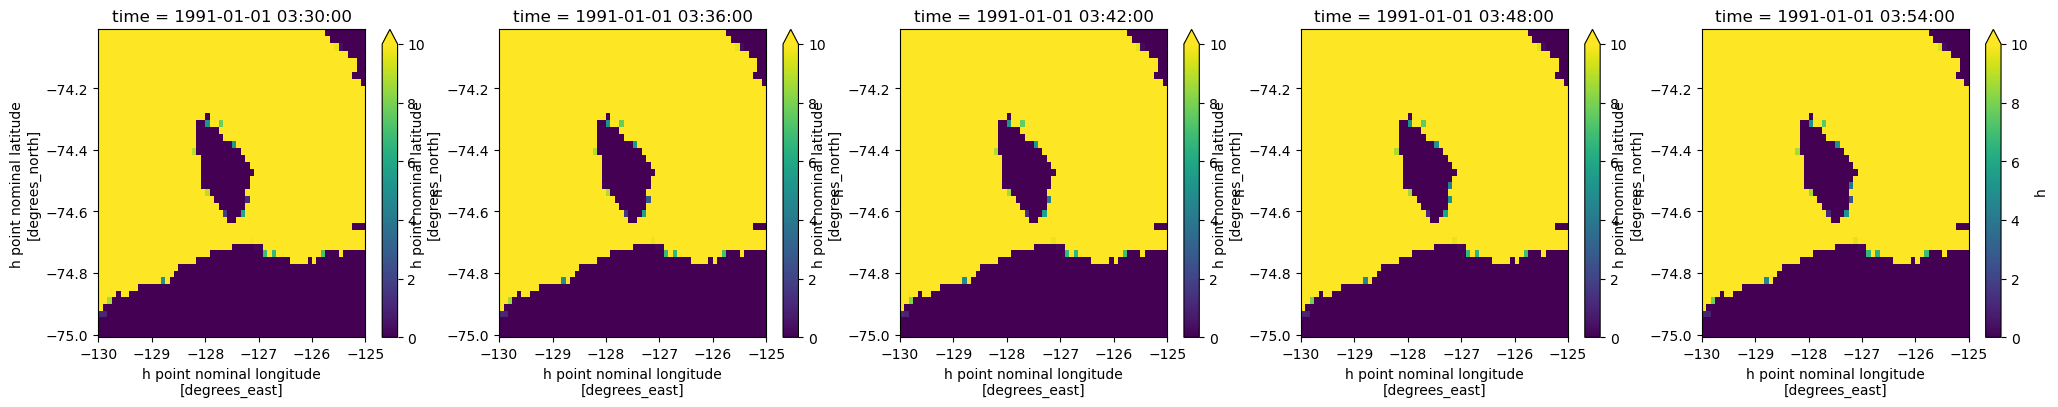

In [24]:
lat_slice = slice(-75,-74)
lon_slice = slice(-130,-125)
fig,axes = plt.subplots(figsize = (25,4),ncols = 5)
(prog.h.isel(time = -9).sel(yh = lat_slice, xh = lon_slice).sum('zl')).plot(ax = axes[0], vmax = 10, vmin = 0)
(prog.h.isel(time = -8).sel(yh = lat_slice, xh = lon_slice).sum('zl')).plot(ax = axes[1], vmax = 10, vmin = 0)
(prog.h.isel(time = -7).sel(yh = lat_slice, xh = lon_slice).sum('zl')).plot(ax = axes[2], vmax = 10, vmin = 0)
(prog.h.isel(time = -6).sel(yh = lat_slice, xh = lon_slice).sum('zl')).plot(ax = axes[3], vmax = 10, vmin = 0)
(prog.h.isel(time = -5).sel(yh = lat_slice, xh = lon_slice).sum('zl')).plot(ax = axes[4], vmax = 10, vmin = 0)


1.5253267


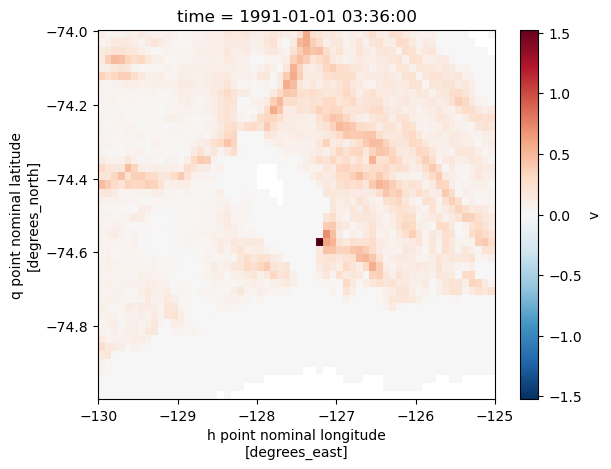

In [67]:
sml_v_8 = prog.v.isel(time = -8).sel(xh = lon_slice, yq = lat_slice).max('zl')
sml_v_8.plot()
x = 33
y = 19
print(sml_v_8[y,x].values)
plt.scatter(sml_v_8.xh[x],sml_v_8.yq[y],color = 'k', alpha = 0.5, s = 10,marker = 'x')

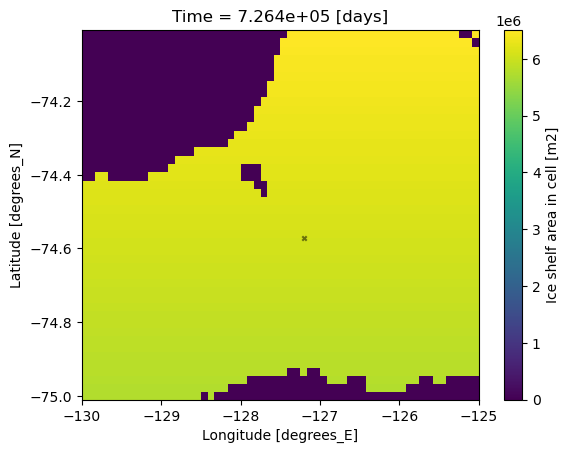

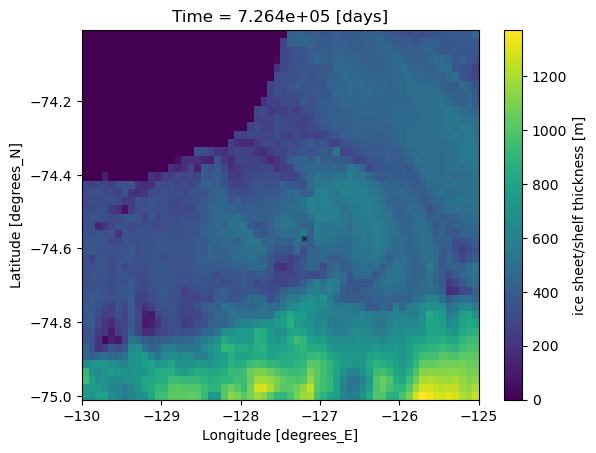

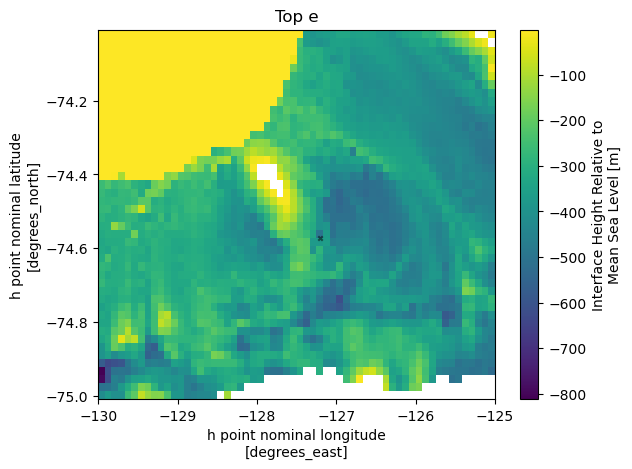

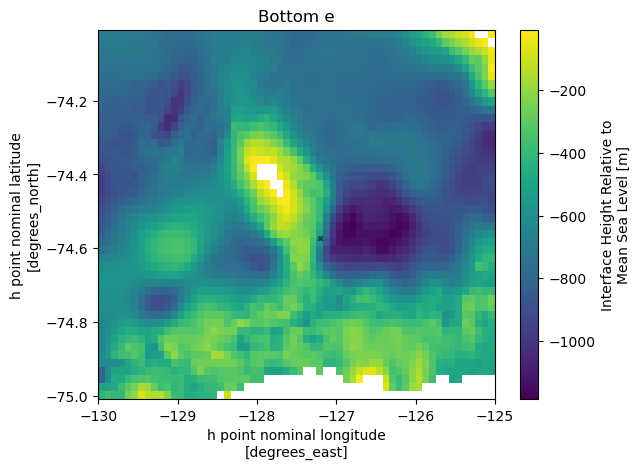

In [66]:
lat_slice = slice(-75,-74)
lon_slice = slice(-130,-125)

MOM_Shelf_IC.shelf_area.sel(lath = lat_slice, lonh = lon_slice).plot()
plt.scatter(sml_v_8.xh[x],sml_v_8.yq[y],color = 'k', alpha = 0.5, s = 10,marker = 'x')
plt.show()
MOM_Shelf_IC.h_shelf.sel(lath = lat_slice, lonh = lon_slice).plot()
plt.scatter(sml_v_8.xh[x],sml_v_8.yq[y],color = 'k', alpha = 0.5, s = 10,marker = 'x')
plt.show()

prog.e.sel(yh = lat_slice, xh = lon_slice).isel(zi = 0,time = -9).plot()
plt.scatter(sml_v_8.xh[x],sml_v_8.yq[y],color = 'k', alpha = 0.5, s = 10,marker = 'x')
plt.title('Top e')
plt.show()

prog.e.sel(yh = lat_slice, xh = lon_slice).isel(zi = -1,time = -9).plot()
plt.scatter(sml_v_8.xh[x],sml_v_8.yq[y],color = 'k', alpha = 0.5, s = 10,marker = 'x')
plt.title('Bottom e')
plt.show()

In [59]:
sml_v_8

<xarray.DataArray 'v' (yq: 45, xh: 60)> Size: 11kB
dask.array<_nanmax_skip-aggregate, shape=(45, 60), dtype=float32, chunksize=(36, 60), chunktype=numpy.ndarray>
Coordinates:
    time     object 8B 1991-01-01 03:36:00
  * xh       (xh) float64 480B -130.0 -129.9 -129.8 ... -125.2 -125.1 -125.0
  * yq       (yq) float64 360B -74.99 -74.97 -74.94 ... -74.05 -74.03 -74.01